In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [46]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


In [47]:
from wordcloud import WordCloud


In [48]:
df=pd.read_csv("netflix1.csv")

In [51]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [53]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [54]:
df.shape

(8790, 10)

In [55]:
df.drop_duplicates(inplace=True)

In [56]:
df.replace("Not Given",np.nan,inplace= True)

In [57]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2588
country          287
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
dtype: int64

In [58]:
df.dropna(subset=['director','country'],inplace=True)

In [59]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [60]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [61]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object

In [62]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...,...
6565,s3351,Movie,True: Grabbleapple Harvest,"Mark Thornton, Todd Kauffman",Canada,2019-11-01,2019,TV-Y,24 min,Children & Family Movies
6566,s3509,Movie,True: Tricky Treat Day,"Mark Thornton, Todd Kauffman",Canada,2019-09-20,2019,TV-Y,24 min,Children & Family Movies
6567,s3554,TV Show,True and the Rainbow Kingdom,"Mark Thornton, Todd Kauffman",United States,2019-08-30,2019,TV-Y,3 Seasons,Kids' TV
6568,s4241,Movie,Sam Kinison: The Scream Continues,Walter C. Miller,United States,2018-12-31,2016,TV-MA,29 min,Documentaries


In [16]:
#Distribution of Content Type

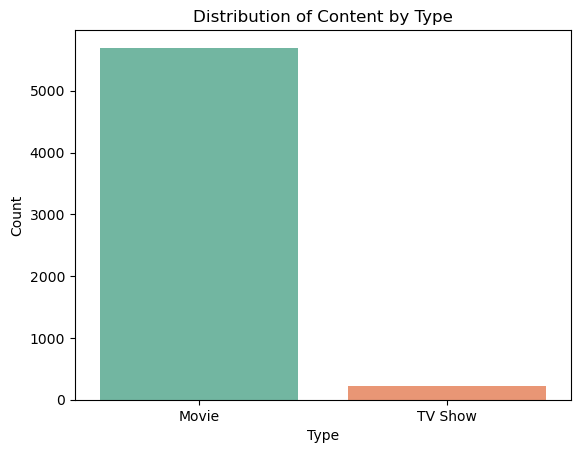

In [77]:
sns.countplot(df, x="type", palette='Set2')
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


In [75]:
top_type=df['type'].value_counts().head(10)
top_type

type
Movie      5696
TV Show     219
Name: count, dtype: int64

In [73]:
# Most Common Genres

In [65]:
#splitting the listed_in columns
df['genres']= df['listed_in'].apply(lambda x:x.split(','))

In [66]:
#combining all genres into one list
all_genres= sum(df['genres'],[])

In [67]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,genres
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,[Documentaries]
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","[Crime TV Shows, International TV Shows, TV ..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries","[TV Dramas, TV Horror, TV Mysteries]"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies","[Children & Family Movies, Comedies]"
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","[Dramas, Independent Movies, International M..."
...,...,...,...,...,...,...,...,...,...,...,...
6565,s3351,Movie,True: Grabbleapple Harvest,"Mark Thornton, Todd Kauffman",Canada,2019-11-01,2019,TV-Y,24 min,Children & Family Movies,[Children & Family Movies]
6566,s3509,Movie,True: Tricky Treat Day,"Mark Thornton, Todd Kauffman",Canada,2019-09-20,2019,TV-Y,24 min,Children & Family Movies,[Children & Family Movies]
6567,s3554,TV Show,True and the Rainbow Kingdom,"Mark Thornton, Todd Kauffman",United States,2019-08-30,2019,TV-Y,3 Seasons,Kids' TV,[Kids' TV]
6568,s4241,Movie,Sam Kinison: The Scream Continues,Walter C. Miller,United States,2018-12-31,2016,TV-MA,29 min,Documentaries,[Documentaries]


In [68]:
#selecting the top 10 most common genes based on count
genre_counts= pd.Series(all_genres).value_counts().head(10)

In [69]:
genre_counts

 International Movies       2445
Dramas                      1543
Comedies                    1154
Action & Adventure           815
 Dramas                      787
Documentaries                730
 Independent Movies          722
 Romantic Movies             585
Children & Family Movies     525
 Thrillers                   496
Name: count, dtype: int64

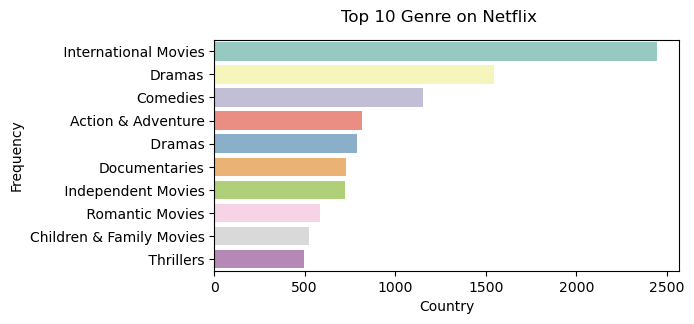

In [71]:
plt.figure(figsize=(6,3))
sns.barplot(x=genre_counts.values, y=genre_counts.index,
palette='Set3')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.suptitle("Top 10 Genre on Netflix")
plt.show()

In [24]:
#Content added over time

In [25]:
df['year_added']=df['date_added'].dt.year

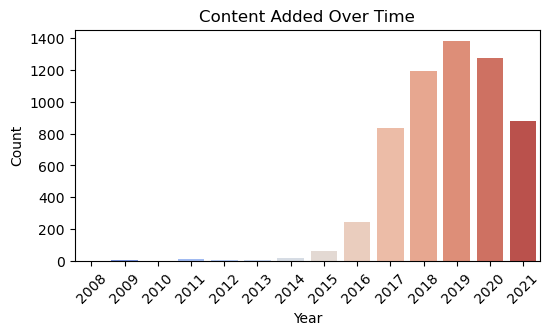

In [26]:
plt.figure(figsize=(6,3))
sns.countplot(x='year_added', data=df, palette='coolwarm')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [27]:
movie_release= df[df['type']=='Movie']['release_year'].value_counts().sort_index()
series_release= df[df['type']=='TV Show']['release_year'].value_counts().sort_index()

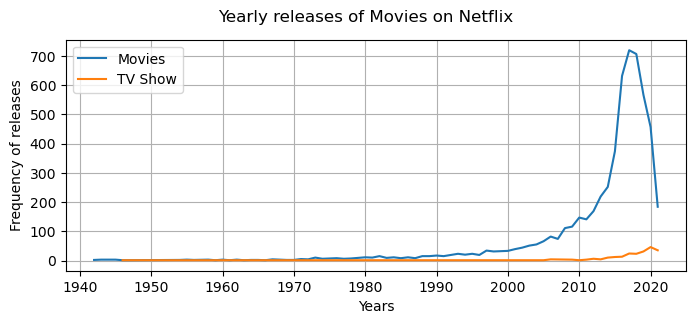

In [28]:
plt.figure(figsize=(8,3))
plt.plot(movie_release.index, movie_release.values,label='Movies')
plt.plot(series_release.index, series_release.values,label='TV Show')
plt.xlabel("Years")
plt.ylabel("Frequency of releases")
plt.grid(True)
plt.suptitle("Yearly releases of Movies on Netflix")
plt.legend()


In [29]:
#distribution of top 10 Countries on Netflix

In [30]:
top_countries=df['country'].value_counts().head(10)

In [78]:
top_countries

country
United States     2401
India              975
United Kingdom     406
Canada             189
France             156
Spain              140
Egypt              107
Nigeria            100
Japan               96
Mexico              93
Name: count, dtype: int64

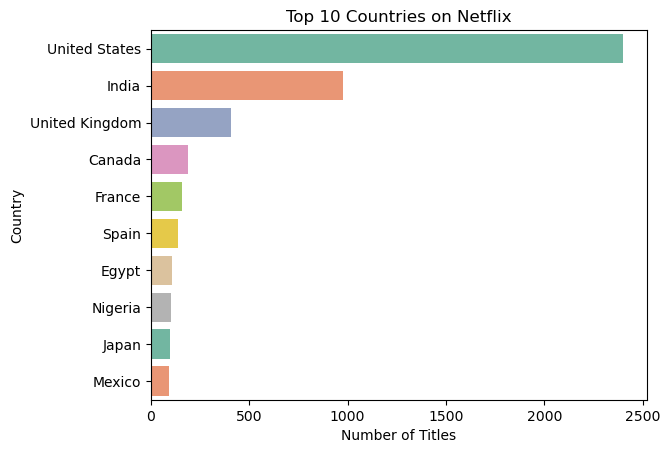

In [31]:
sns.barplot(df, x=top_countries.values , y=top_countries.index, palette='Set2')
plt.title('Top 10 Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

In [32]:
# Distribution of top 10 duration of contents on Netflix

In [33]:
top_duration=df['duration'].value_counts().head(10)

Text(0.5, 1.0, 'Distribution of top 10 Durations')

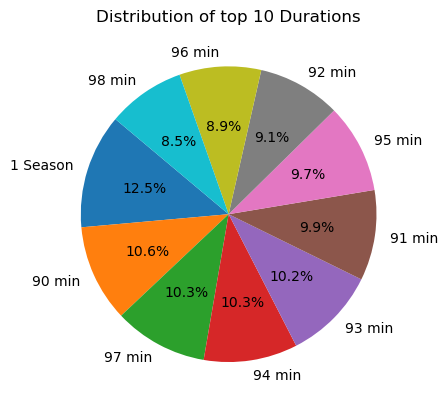

In [34]:
plt.pie(top_duration,labels=top_duration.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of top 10 Durations')

In [35]:
#Distribution of Top 10 Movie ratings on Netflix

In [79]:
top_ratings=df['rating'].value_counts().head(10)
top_ratings

rating
TV-MA    2029
TV-14    1368
R         787
TV-PG     521
PG-13     486
PG        281
TV-G      112
TV-Y7     108
TV-Y       99
NR         75
Name: count, dtype: int64

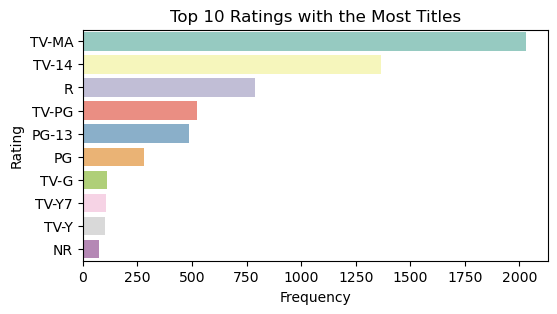

In [37]:
plt.figure(figsize=(6,3))
sns.barplot(data=df , x= top_ratings.values, y=top_ratings.index,palette='Set3' )
plt.title('Top 10 Ratings with the Most Titles')
plt.xlabel('Frequency')
plt.ylabel('Rating')
plt.show()

In [38]:
top_director=df['director'].value_counts().head(10)

In [39]:
top_director

director
Rajiv Chilaka             20
Alastair Fothergill       18
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Jay Chapman               12
Youssef Chahine           12
Name: count, dtype: int64

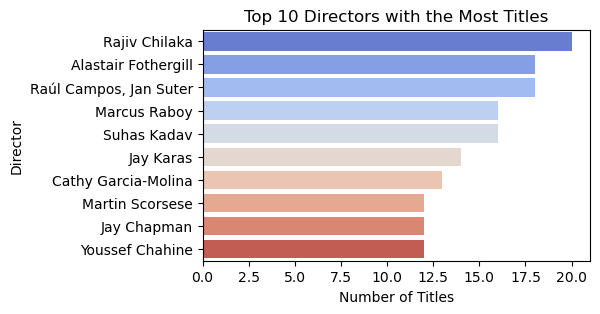

In [40]:
plt.figure(figsize=(5,3))
sns.barplot(x=top_director.values, y=top_director.index, palette='coolwarm')
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

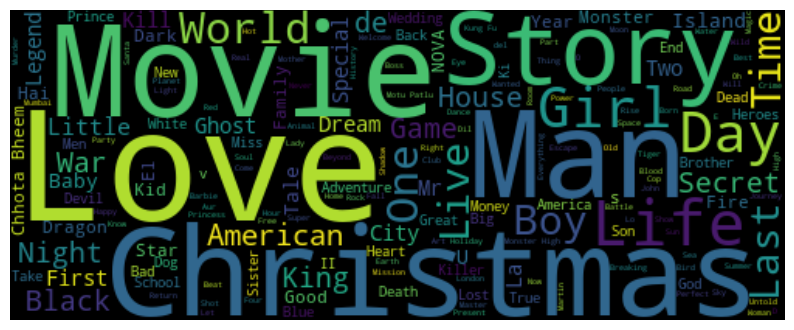

In [70]:
movie_titles = df[df['type'] == 'Movie']['title']
wordcloud = WordCloud(width=500, height=200,
background_color='black').generate(' '.join(movie_titles))
# Plot word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()